# Notebook for preparing and saving CYCLES graphs

In [1]:
# import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


: 

: 

# Download CYCLES dataset for n=56 and k=6:
For preparation for other n and k values, please change values of n and k and re-prepare

In [3]:
if not os.path.isfile('datasets_kcycle_k=6_nsamples=10000.pickle'):
    print('downloading..')
    # This dataset original link can be found at: https://github.com/cvignac/SMP
    # The pickle file with k=6 is hosted at the below link and will be downloaded
    !curl https://www.dropbox.com/s/e1nd889j7vfunnh/datasets_kcycle_k%3D6_nsamples%3D10000.pickle?dl=1 -o datasets_kcycle_k=6_nsamples=10000.pickle -J -L -k
    # !unzip cycles.zip -d ../
    # !tar -xvf cycles.zip -C ../
else:
    print('File already downloaded')
    

downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   169    0   169    0     0    761      0 --:--:-- --:--:-- --:--:--   764
100   363  100   363    0     0    647      0 --:--:-- --:--:-- --:--:--     0
100  273M  100  273M    0     0  10.2M      0  0:00:26  0:00:26 --:--:-- 11.2M


In [4]:
# Use the build_dataset() util function adatped from cvignac/SMP
from build_cycles import build_dataset
build_dataset()

# Convert to DGL format and save with pickle

In [5]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/home/psoga/Documents/projects/benchmarking-gnns


In [6]:
import pickle

%load_ext autoreload
%autoreload 2

from data.cycles import CyclesDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.cycles import CyclesDataset


Using backend: pytorch


In [7]:
DATASET_NAME = 'CYCLES'
n = 56
k = 6
dataset = CyclesDatasetDGL(DATASET_NAME, n=n, k=k) 

preparing 9000 graphs for the TRAIN set...


/home/psoga/.virtualenvs/gnn/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


preparing 1000 graphs for the VAL set...
preparing 10000 graphs for the TEST set...
Time taken: 349.0540s


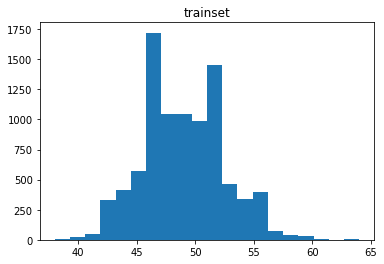

min/max : 38 64


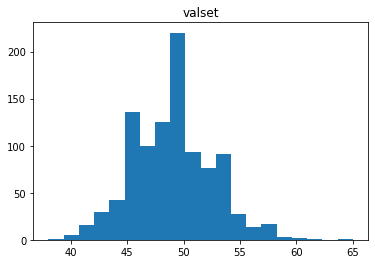

min/max : 38 65


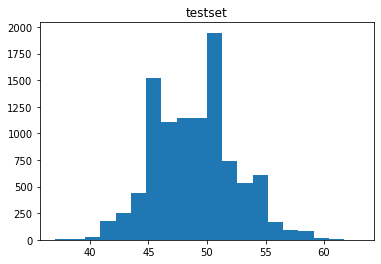

min/max : 37 63


In [8]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [62]:
import dgl
import networkx as nx
# print(len(dataset.train))
# print(len(dataset.val))
# print(len(dataset.test))
print(len(dataset.train[23][0]))
print(max(dataset, key=lambda x: len(x[0])))
# print(dataset.val[0])
# print(dataset.test[0])

55


In [9]:
start = time.time()
with open('data/cycles/CYCLES'+'_'+str(k)+'_'+str(n)+'.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
print('Time (sec):',time.time() - start)


Time (sec): 7.550283193588257


# Test load function

In [10]:
DATASET_NAME = 'CYCLES'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset CYCLES...
train, test, val sizes : 9000 10000 1000
[I] Finished loading.
[I] Data load time: 9.1989s


In [11]:
batch_size = 10
collate = CyclesDataset.collate
print(CyclesDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.cycles.CyclesDataset'>
